In [1]:
# import required library
import torch
import numpy as np
import torchvision
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### I got the SSL_Certificate_Verified_error
### So I manually download the data and unzip and put it on the required directory

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download Training data from open datasets
data = torchvision.datasets.EuroSAT(
    root="data",   # where to download data to?
    download=True, # download if doesnot exist on disk
    transform=ToTensor(),  # image come as PIL format, convert this into tensor
    target_transform=None  # for transform label as well
)

100%|██████████| 94.3M/94.3M [00:00<00:00, 200MB/s]


Extracting data/eurosat/EuroSAT.zip to data/eurosat


In [4]:
data

Dataset EuroSAT
    Number of datapoints: 27000
    Root location: data
    StandardTransform
Transform: ToTensor()

In [5]:
# Splitting the data for training and testing
#import sklearn
#from sklearn.model_selection import train_test_split
#training_data, testing_data = train_test_split(data, test_size=0.2, random_state=42)

# It takes too much time to split so better to use
# torch.utils.data.random_split
# train_test_split from scikit learn is not optimized for handling tensor so it returns the list
# as the training and testing sets
torch.manual_seed(42)
from torch.utils.data import random_split
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
print(train_size, test_size)
training_data, testing_data = random_split(data, [train_size, test_size])

21600 5400


In [6]:
# How many sample are there
len(training_data), len(testing_data)
print(type(training_data))
print(type(training_data[0]))

<class 'torch.utils.data.dataset.Subset'>
<class 'tuple'>


In [7]:
print(training_data[0])

(tensor([[[0.2353, 0.2353, 0.2392,  ..., 0.1882, 0.1843, 0.1843],
         [0.2392, 0.2392, 0.2392,  ..., 0.1882, 0.1843, 0.1843],
         [0.2392, 0.2353, 0.2353,  ..., 0.2000, 0.1843, 0.1922],
         ...,
         [0.2902, 0.2902, 0.2902,  ..., 0.2510, 0.2510, 0.2471],
         [0.2824, 0.2863, 0.2667,  ..., 0.2667, 0.2588, 0.2510],
         [0.2392, 0.2392, 0.2392,  ..., 0.2588, 0.2549, 0.2510]],

        [[0.3020, 0.3020, 0.2980,  ..., 0.3059, 0.3020, 0.3020],
         [0.2980, 0.2980, 0.2980,  ..., 0.3059, 0.3020, 0.3020],
         [0.2941, 0.2941, 0.2941,  ..., 0.3059, 0.2902, 0.2980],
         ...,
         [0.3333, 0.3333, 0.3333,  ..., 0.3098, 0.3098, 0.3059],
         [0.3373, 0.3412, 0.3176,  ..., 0.3255, 0.3176, 0.3098],
         [0.2980, 0.2980, 0.2902,  ..., 0.3176, 0.3137, 0.3098]],

        [[0.4196, 0.4196, 0.4275,  ..., 0.4157, 0.4118, 0.4118],
         [0.4196, 0.4196, 0.4275,  ..., 0.4157, 0.4118, 0.4118],
         [0.4078, 0.4157, 0.4235,  ..., 0.4118, 0.4039, 0

In [8]:
# see classes name
# While creating a subset using random_split mwthod, the subset object doesnot have a classes attribute.
# The classes attribute is available on the original datset so used data.classes
class_names = data.classes
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [9]:
# Visualize the data
image_tensor, label = training_data[0]
image_tensor, label

(tensor([[[0.2353, 0.2353, 0.2392,  ..., 0.1882, 0.1843, 0.1843],
          [0.2392, 0.2392, 0.2392,  ..., 0.1882, 0.1843, 0.1843],
          [0.2392, 0.2353, 0.2353,  ..., 0.2000, 0.1843, 0.1922],
          ...,
          [0.2902, 0.2902, 0.2902,  ..., 0.2510, 0.2510, 0.2471],
          [0.2824, 0.2863, 0.2667,  ..., 0.2667, 0.2588, 0.2510],
          [0.2392, 0.2392, 0.2392,  ..., 0.2588, 0.2549, 0.2510]],
 
         [[0.3020, 0.3020, 0.2980,  ..., 0.3059, 0.3020, 0.3020],
          [0.2980, 0.2980, 0.2980,  ..., 0.3059, 0.3020, 0.3020],
          [0.2941, 0.2941, 0.2941,  ..., 0.3059, 0.2902, 0.2980],
          ...,
          [0.3333, 0.3333, 0.3333,  ..., 0.3098, 0.3098, 0.3059],
          [0.3373, 0.3412, 0.3176,  ..., 0.3255, 0.3176, 0.3098],
          [0.2980, 0.2980, 0.2902,  ..., 0.3176, 0.3137, 0.3098]],
 
         [[0.4196, 0.4196, 0.4275,  ..., 0.4157, 0.4118, 0.4118],
          [0.4196, 0.4196, 0.4275,  ..., 0.4157, 0.4118, 0.4118],
          [0.4078, 0.4157, 0.4235,  ...,

In [10]:
image_tensor.shape  # color_channel, height, width

torch.Size([3, 64, 64])

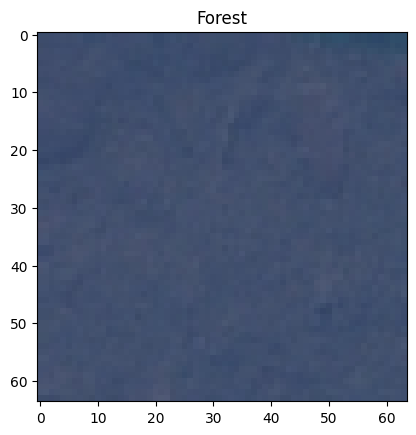

In [11]:
# converting the image into numpy from tensor
image_np = image_tensor.numpy()  # shape will be (C, H, W)

# Rearrange the dimension
image_np = np.transpose(image_np, (1,2,0))  # shape will be (H, W, C)

# plot the image
plt.imshow(image_np.squeeze())
plt.title(class_names[label])
plt.show()

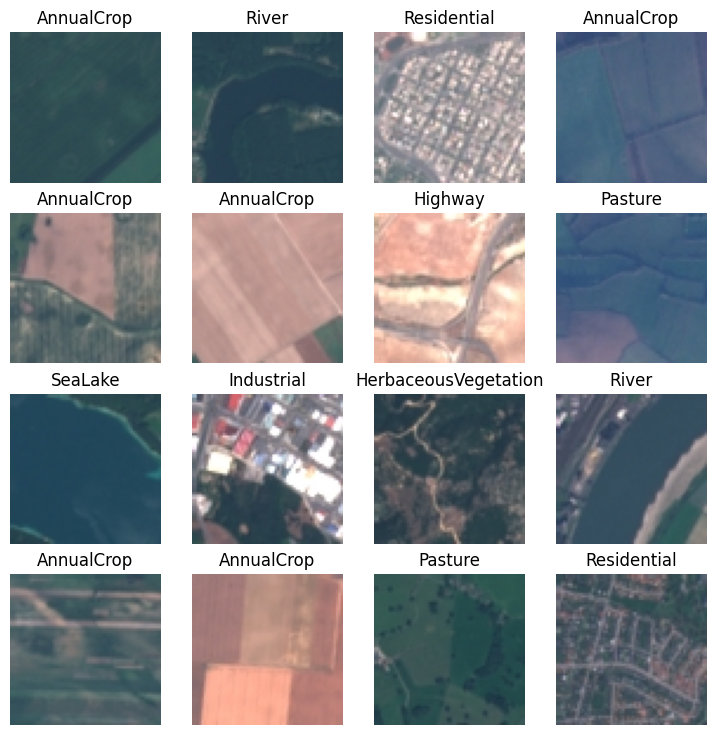

In [12]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(training_data), size=[1]).item()
    img_tensor, label = training_data[random_idx]
    img_np = img_tensor.numpy()
    img_np = np.transpose(img_np, (1,2,0))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img_np.squeeze())
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
# Prepare DataLoader

# Setup the batch_size hyperparameter

BATCH_SIZE = 32

# Turn the data into iterables
train_dataloader = DataLoader(training_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(testing_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

In [14]:
print(len(train_dataloader))
type(train_dataloader)

675


torch.utils.data.dataloader.DataLoader

In [15]:
# Check out what's we have created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7d64baa92500>, <torch.utils.data.dataloader.DataLoader object at 0x7d64baa91fc0>)
Length of train dataloader: 675 batches of 32
Length of test dataLoader: 169 batches of 32


In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(len(train_features_batch))
train_features_batch.shape, train_labels_batch.shape

32


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

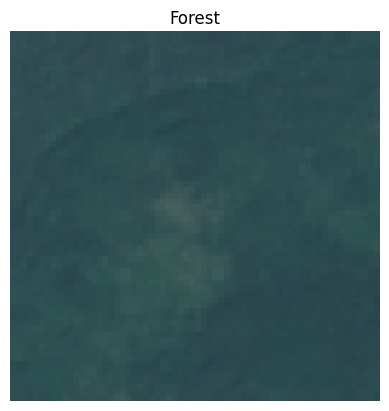

In [17]:
# Data remains unchnaged by checking a single sample

# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img_tensor, label = train_features_batch[random_idx], train_labels_batch[random_idx]
img_np = img_tensor.numpy()
img_np = np.transpose(img_np, (1,2,0))
plt.imshow(img_np.squeeze())
plt.title(class_names[label])
plt.axis(False)
plt.show()

#### Model 0: Build a baseline Model

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Getting a single sample
x = train_features_batch

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([32, 3, 64, 64])
Shape after flattening: torch.Size([32, 12288])


In [19]:
# Model
class EuroSATV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
len(class_names)

10

In [21]:
# Create an instances of our model
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = EuroSATV0(input_shape=12288,
                    hidden_units=16,
                    output_shape=len(class_names)
                    )

In [22]:
# Setup loss, optimizer and Evaluation Metrices

import requests
from pathlib import Path

# Download helper function from repo
if Path("helper_function.py").is_file():
    print(f"Helper function already exist skipping downloading")

else:
    print(f"Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

In [24]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

In [25]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [26]:
# training function
def train_fun(model:torch.nn.Module,
              train_data:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device
              ):
    # Put the model in train mode
    # Forward pass
    # Calculate loss
    # Calculate acc
    # optimizer zero_grad
    # loss backward
    # optimizer step
    torch.manual_seed(42)
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X,y) in enumerate(train_data):
        model.train()
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        train_loss += loss
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 100 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss/=len(train_data)
    train_acc/=len(train_data)
    print(f"\nTrain loss: {train_loss:.5f}, train acc: {train_acc:.2f}%\n")
    return train_loss, train_acc

In [27]:
# Testing function
def test_fn(model:torch.nn.Module,
            test_data:torch.utils.data.DataLoader,
            loss_fn:torch.nn.Module,
            accuracy_fn,
            device=torch.device,
            ):
    test_loss, test_acc = 0, 0
    # put the model in eval mode
    # use inference mode
    # Forward pass
    # Calculate loss
    # Calculate acc
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in test_data:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = loss_fn(y_pred, y)

            acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            test_loss+=loss
            test_acc+=acc
        test_loss/=len(test_data)
        test_acc/=len(test_data)

    print(f"\nTest loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
    return test_loss, test_acc


In [28]:
import openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook
import os

filename = "training_sheet.xlsx"

# check if the file exist
if os.path.exists(filename):
    print(f"File already exist")
    my_workbook = load_workbook("training_sheet.xlsx")

else:
    my_workbook = Workbook()
    my_workbook.save(filename)

sheet = my_workbook.active
#sheet.append(["Epoch","Learning Rate","Train loss", "Train Acc", "Test loss","Test loss", "Test Acc"])
sheet.append(["Model Name","Learning Rate", "Epoch","Train Loss","Train Acc","Test Loss","Test Acc"])
file_path = "/content/drive/MyDrive/training_sheet.xlsx"
my_workbook.save(file_path)

In [29]:
# Setting learning Rate
torch.manual_seed(42)
Train_Loss = []
Train_Acc = []
Test_Loss = []
Test_Acc = []
learning_rate = [0.01,0.03,0.06,0.09]
device = "cuda" if torch.cuda.is_available() else "cpu"
for LR in learning_rate:
    # setup optimizer with learning rate
    optimizer = torch.optim.SGD(params=model_0.parameters(), lr=LR)
    epochs = 100
    for epoch in range(epochs):
        #print(f"Epoch: {epoch+1}")
        train_loss, train_acc = train_fun(model=model_0,
              train_data=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)

        test_loss, test_acc = test_fn(model=model_0,
            test_data=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
        if (epoch+1)%25==0:
            Train_Loss.append(train_loss)
            Train_Acc.append(train_acc)
            Test_Loss.append(test_loss)
            Test_Acc.append(test_acc)


Looked at 0/21600 samples
Looked at 3200/21600 samples
Looked at 6400/21600 samples
Looked at 9600/21600 samples
Looked at 12800/21600 samples
Looked at 16000/21600 samples
Looked at 19200/21600 samples

Train loss: 2.16992, train acc: 22.79%


Test loss: 2.14632, Test acc: 22.04%

Looked at 0/21600 samples
Looked at 3200/21600 samples
Looked at 6400/21600 samples
Looked at 9600/21600 samples
Looked at 12800/21600 samples
Looked at 16000/21600 samples
Looked at 19200/21600 samples

Train loss: 2.07701, train acc: 27.34%


Test loss: 2.07383, Test acc: 25.61%

Looked at 0/21600 samples
Looked at 3200/21600 samples
Looked at 6400/21600 samples
Looked at 9600/21600 samples
Looked at 12800/21600 samples
Looked at 16000/21600 samples
Looked at 19200/21600 samples

Train loss: 2.04924, train acc: 28.45%


Test loss: 2.04265, Test acc: 27.54%

Looked at 0/21600 samples
Looked at 3200/21600 samples
Looked at 6400/21600 samples
Looked at 9600/21600 samples
Looked at 12800/21600 samples
Looked a

KeyboardInterrupt: 

In [30]:
Train_Loss = [tensor.item() for tensor in Train_Loss]  # Converting tensor into float
Train_Acc
Test_Loss = [tensor.item() for tensor in Test_Loss]    # Converting tensor into float
Train_Acc

[38.0787037037037,
 42.61574074074074,
 43.74074074074074,
 44.31018518518518,
 41.120370370370374,
 41.89351851851852,
 42.138888888888886,
 42.9537037037037,
 10.967592592592593,
 10.967592592592593,
 10.967592592592593,
 10.967592592592593,
 10.967592592592593,
 10.967592592592593,
 10.967592592592593]

In [33]:
for LR in enumerate(learning_rate):
    epochs = 100
    i=0
    for epoch in range(epochs):
        if (epoch+1)%25==0:
            sheet.append(["ModelV0",epoch+1,Train_Loss[i],Train_Acc[i],Test_Loss[i],Test_Acc[i]])
            i+=1
            file_path = "/content/drive/MyDrive/training_sheet.xlsx"
            my_workbook.save(file_path)

